In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

## training set e test set

In [83]:
df = pd.read_csv('Train_Attrition_Cat.csv', sep=";")

test_set = pd.read_csv('Test_pulito2_senzaOut.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   object
 2   BusinessTravel            1013 non-null   int64 
 3   Department                1013 non-null   int64 
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   int64 
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   int64 
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   int64 
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

In [3]:
#portiamo i valori categorici a valori numerici 
label_encoders = dict()
column2encode = ['BusinessTravel','Department','EducationField','MaritalStatus','JobRole']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    

### prima usiamo il validation test

In [4]:
attributes = [col for col in df.columns if col != 'Attrition']
X = df[attributes].values
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

### best attributes: 
per recall = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

per F1 = {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [5]:
#per recall = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=5, min_samples_leaf=2)
# we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5)

### performance evaluation tramite VALIDATION SET

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.7828947368421053
F1-score [0.87007874 0.34      ]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.87      0.87       253
         Yes       0.35      0.33      0.34        51

    accuracy                           0.78       304
   macro avg       0.61      0.60      0.61       304
weighted avg       0.78      0.78      0.78       304



In [9]:
confusion_matrix(y_test, y_pred)

array([[221,  32],
       [ 34,  17]])

### Cross validation

In [22]:
#con valori
#{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7728 (+/- 0.09)
F1-score: 0.5909 (+/- 0.14)


In [ ]:
#qui usiamo per F1 = {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [90]:
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=15, 
                             min_samples_split=5, min_samples_leaf=5)
# we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5)

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.7763157894736842
F1-score [0.864      0.37037037]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.85      0.86       253
         Yes       0.35      0.39      0.37        51

    accuracy                           0.78       304
   macro avg       0.61      0.62      0.62       304
weighted avg       0.79      0.78      0.78       304



In [27]:

scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8095 (+/- 0.08)
F1-score: 0.6337 (+/- 0.18)


### performance evaluation su TEST SET

In [84]:
for col in column2encode:
    le = LabelEncoder()
    test_set[col] = le.fit_transform(test_set[col])
    label_encoders[col] = le

In [85]:
attributes = [col for col in test_set.columns if col != 'Attrition']
x_test = test_set[attributes].values
y_test = test_set['Attrition']

In [86]:
clf

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5)

In [87]:
y_pred = clf.predict(x_test)

In [88]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.795
F1-score [0.88046647 0.28070175]


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       169
         Yes       0.31      0.26      0.28        31

    accuracy                           0.80       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.78      0.80      0.79       200



In [91]:
clf

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5)

In [92]:
y_pred = clf.predict(x_test)

In [93]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.8
F1-score [0.88095238 0.375     ]


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.89      0.88      0.88       169
         Yes       0.36      0.39      0.38        31

    accuracy                           0.80       200
   macro avg       0.62      0.63      0.63       200
weighted avg       0.81      0.80      0.80       200



In [10]:
from sklearn.preprocessing import LabelBinarizer

In [95]:
lb = LabelBinarizer()
lb.fit(y_test)
lb.classes_.tolist()

['No', 'Yes']

In [96]:
fpr = dict()
tpr = dict()
roc_auc = dict()
by_test = lb.transform(y_test)
by_pred = lb.transform(y_pred)

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(by_test, by_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
roc_auc = roc_auc_score(by_test, by_pred, average=None)
roc_auc

0.6314182095819814

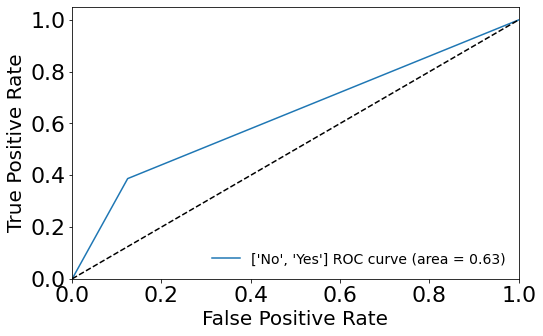

In [97]:
plt.figure(figsize=(8, 5))
plt.plot(fpr[1], tpr[1], label='%s ROC curve (area = %0.2f)' % (lb.classes_.tolist(), roc_auc))
    
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()